# (15) Reservoir + GLM

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from analysis.opticflow import *
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.glm import ReadoutGLM, LinearModel

## Shallow

In [3]:
vae = VAE(ConfigVAE(
    'fixate1', n_enc_cells=1, n_dec_cells=1, n_enc_nodes=3, n_dec_nodes=2,
    n_latent_scales=3, n_groups_per_scale=8, n_latent_per_group=20,
))
tr = TrainerVAE(vae, ConfigTrainVAE(batch_size=1000), device='cuda')
vae.print()
print(vae.cfg.name())
vae.scales, vae.cfg.total_latents()

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
|     VAE      |  16.1 Mil  |
|     ---      |    ---     |
|     stem     |    320     |
| pre_process  |  151.6 K   |
|  enc_tower   |  8.3 Mil   |
|     enc0     |   66.0 K   |
| enc_sampler  |  1.7 Mil   |
| dec_sampler  |  1.7 Mil   |
|    expand    |  234.2 K   |
|  dec_tower   |  3.8 Mil   |
| post_process |   67.9 K   |
|     out      |    578     |
+--------------+------------+

fixate1_k-32_z-20x[2,4,8]_enc(1x3)-dec(1x2)-pre(1x3)-post(1x3)

([8, 4, 2], 280)

In [4]:
sum(vae.ftr_sizes()[0].values())

1984

## Test on a few neurons

### clu090

In [5]:
%%time

ro = ReadoutGLM(root='YUWEI', expt='clu090', tr=tr, verbose=True).fit_readout()

[PROGRESS] neural data loaded

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]


[PROGRESS] features extracted

100%|███████████████████████████████████| 54386/54386 [00:33<00:00, 1636.38it/s]


[PROGRESS] sta computed

[PROGRESS] best lag estimated

CPU times: user 1min 11s, sys: 12.1 s, total: 1min 23s
Wall time: 1min 23s


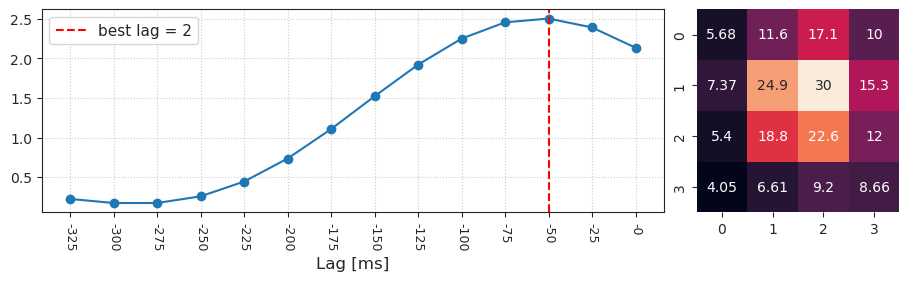

In [6]:
ro.show(0)

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (1, 2)

None

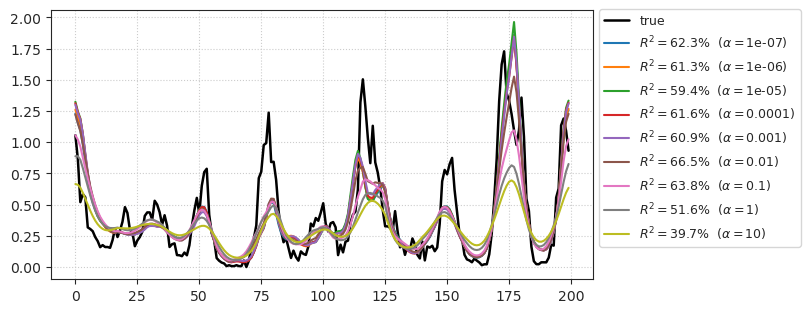

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (1, 1)

None

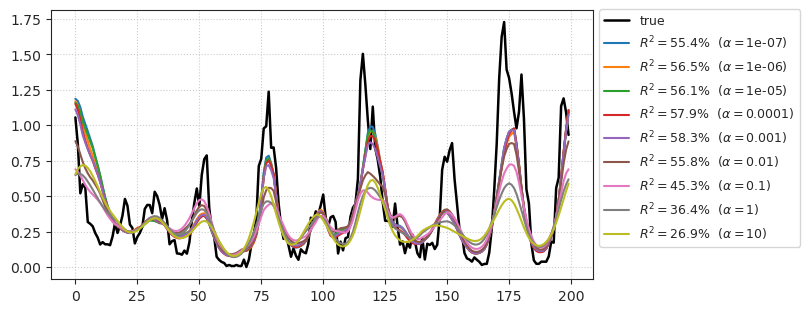

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (2, 2)

None

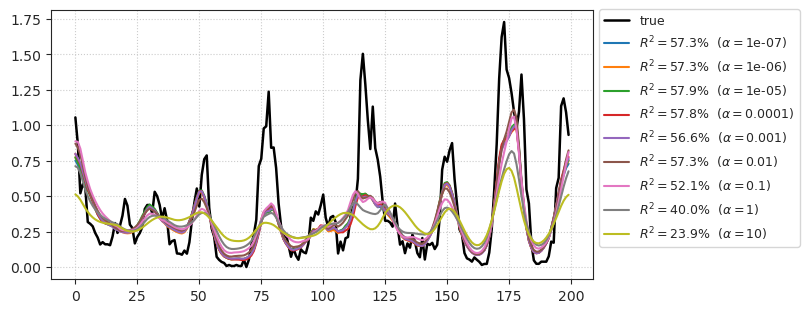

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (2, 1)

None

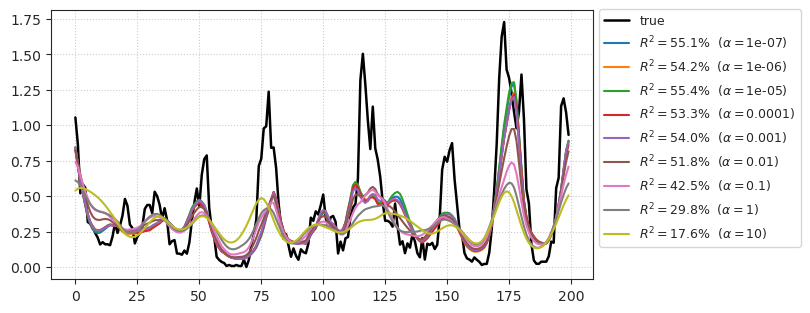

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (0, 2)

None

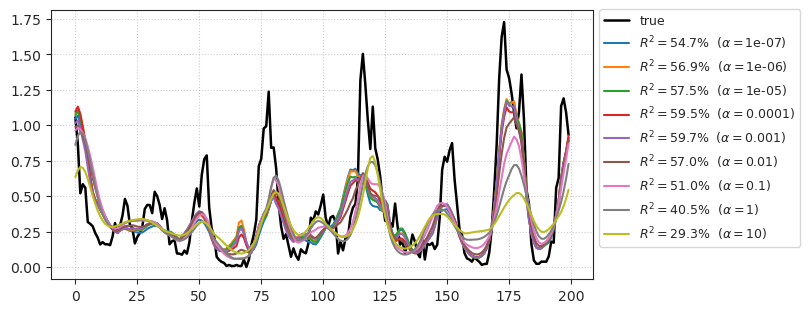

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (1, 3)

None

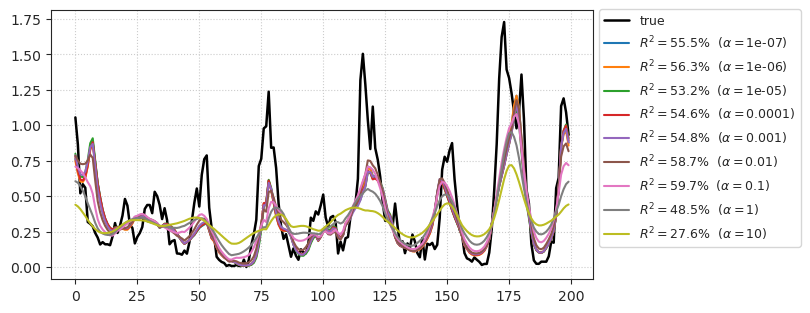

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (2, 3)

None

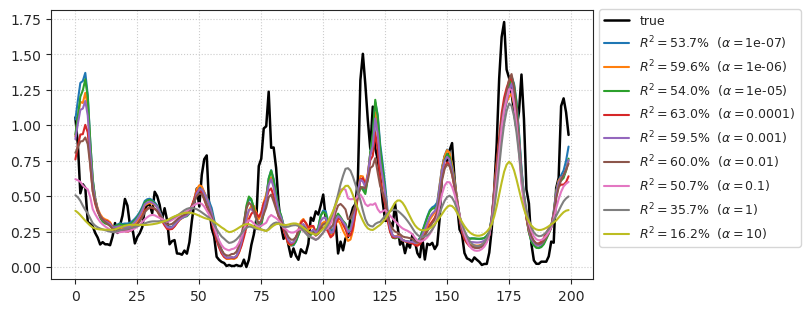

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu090, neuron # 0; pix: (i, j) = (0, 1)

None

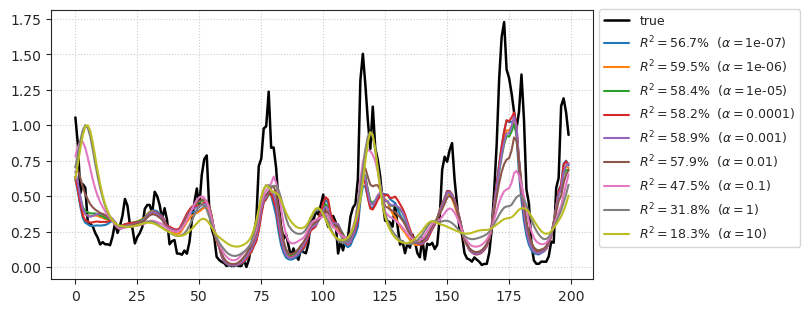

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clu090, neuron # 0;  best alpha = 1e-06, best_r = 0.874

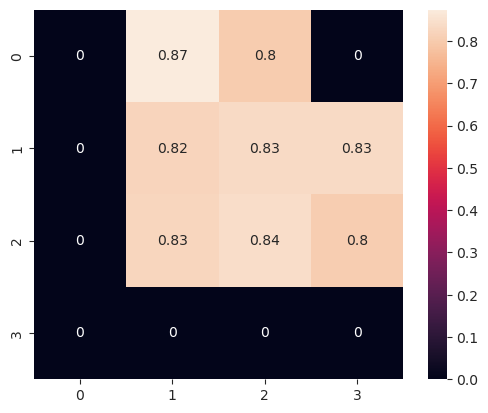

CPU times: user 2h 13min 25s, sys: 6min 20s, total: 2h 19min 46s
Wall time: 21min 6s


In [7]:
%%time

perf_r, perf_r2 = ro.fit_neuron(0, full=False)
sns.heatmap(perf_r, square=True, annot=True)
plt.show()

### clu110

In [5]:
%%time

ro = ReadoutGLM(root='YUWEI', expt='clu110', tr=tr, verbose=True).fit_readout()

[PROGRESS] neural data loaded

100%|███████████████████████████████████████████| 22/22 [00:08<00:00,  2.66it/s]


[PROGRESS] features extracted

100%|███████████████████████████████████| 18616/18616 [00:11<00:00, 1555.03it/s]


[PROGRESS] sta computed

[PROGRESS] best lag estimated

CPU times: user 24.9 s, sys: 4.22 s, total: 29.1 s
Wall time: 29.1 s


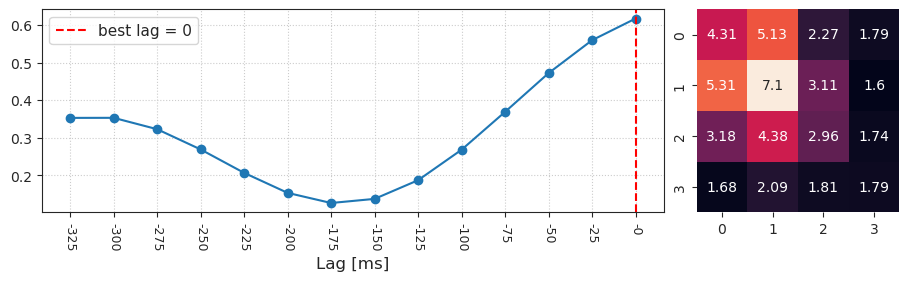

In [6]:
ro.show(0)

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (1, 1)

r      nnll
alpha                           
1.000000e-07  0.148332  0.026283
1.000000e-06  0.148442  0.027537
1.000000e-05  0.145535  0.025760
1.000000e-04  0.141742  0.019958
1.000000e-03  0.139150  0.024697
1.000000e-02  0.129026  0.034809
1.000000e-01  0.105300  0.027230
1.000000e+00  0.096795  0.022385
1.000000e+01  0.086210  0.018588

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (1, 0)

r      nnll
alpha                           
1.000000e-07  0.150760  0.035954
1.000000e-06  0.153564  0.034370
1.000000e-05  0.153169  0.037544
1.000000e-04  0.153275  0.039765
1.000000e-03  0.149220  0.039002
1.000000e-02  0.138676  0.040701
1.000000e-01  0.115862  0.030943
1.000000e+00  0.096062  0.023679
1.000000e+01  0.081499  0.017113

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (0, 1)

r      nnll
alpha                           
1.000000e-07  0.160648  0.040122
1.000000e-06  0.159362  0.042580
1.000000e-05  0.163143  0.039422
1.000000e-04  0.159276  0.043511
1.000000e-03  0.157532  0.045884
1.000000e-02  0.141832  0.047390
1.000000e-01  0.107801  0.030710
1.000000e+00  0.089056  0.022236
1.000000e+01  0.074327  0.015385

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (2, 1)

r      nnll
alpha                           
1.000000e-07  0.163386  0.043777
1.000000e-06  0.166453  0.045888
1.000000e-05  0.168056  0.040979
1.000000e-04  0.164005  0.041530
1.000000e-03  0.162256  0.049737
1.000000e-02  0.154750  0.049908
1.000000e-01  0.123677  0.034313
1.000000e+00  0.097483  0.023134
1.000000e+01  0.073232  0.014113

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (0, 0)

r      nnll
alpha                           
1.000000e-07  0.151529  0.054276
1.000000e-06  0.148900  0.053391
1.000000e-05  0.143736  0.050412
1.000000e-04  0.153715  0.054906
1.000000e-03  0.146740  0.052877
1.000000e-02  0.136392  0.047981
1.000000e-01  0.107307  0.028247
1.000000e+00  0.092166  0.021633
1.000000e+01  0.077600  0.015273

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (2, 0)

r      nnll
alpha                           
1.000000e-07  0.102687  0.007813
1.000000e-06  0.104864  0.001752
1.000000e-05  0.120278  0.011694
1.000000e-04  0.117367  0.004044
1.000000e-03  0.120070  0.024027
1.000000e-02  0.125584  0.034190
1.000000e-01  0.103416  0.027382
1.000000e+00  0.084832  0.019802
1.000000e+01  0.070285  0.012952

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (1, 2)

r      nnll
alpha                           
1.000000e-07  0.151738  0.037189
1.000000e-06  0.150578  0.034781
1.000000e-05  0.152104  0.039289
1.000000e-04  0.153529  0.038531
1.000000e-03  0.155203  0.053315
1.000000e-02  0.138868  0.048041
1.000000e-01  0.118944  0.037474
1.000000e+00  0.102308  0.028154
1.000000e+01  0.074330  0.014568

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu110, neuron # 0; pix: (i, j) = (2, 2)

r      nnll
alpha                           
1.000000e-07  0.176034  0.028941
1.000000e-06  0.181739  0.033173
1.000000e-05  0.177353  0.039892
1.000000e-04  0.177468  0.032231
1.000000e-03  0.183387  0.048491
1.000000e-02  0.166928  0.061149
1.000000e-01  0.123070  0.041288
1.000000e+00  0.081054  0.018142
1.000000e+01  0.051920  0.006886

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clu110, neuron # 0;  best alpha = 0.001, best_r = 0.183

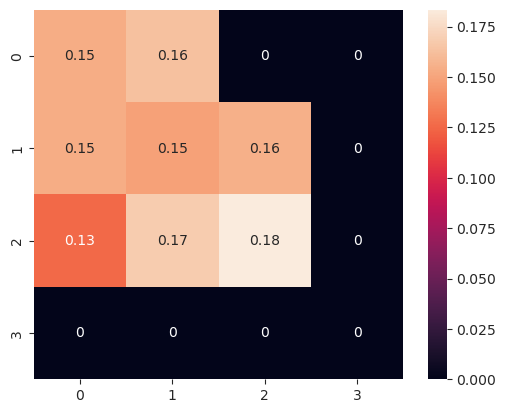

CPU times: user 2h 23min 36s, sys: 1min 21s, total: 2h 24min 57s
Wall time: 7min 21s


In [7]:
%%time

perf_r, perf_r2 = ro.fit_neuron(0, full=False)
sns.heatmap(perf_r, square=True, annot=True)
plt.show()

### clu225

In [8]:
%%time

ro = ReadoutGLM(root='YUWEI', expt='clu225', tr=tr, verbose=True).fit_readout()

[PROGRESS] neural data loaded

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]


[PROGRESS] features extracted

100%|███████████████████████████████████| 35283/35283 [00:23<00:00, 1493.36it/s]


[PROGRESS] sta computed

[PROGRESS] best lag estimated

CPU times: user 47 s, sys: 7.18 s, total: 54.1 s
Wall time: 53.9 s


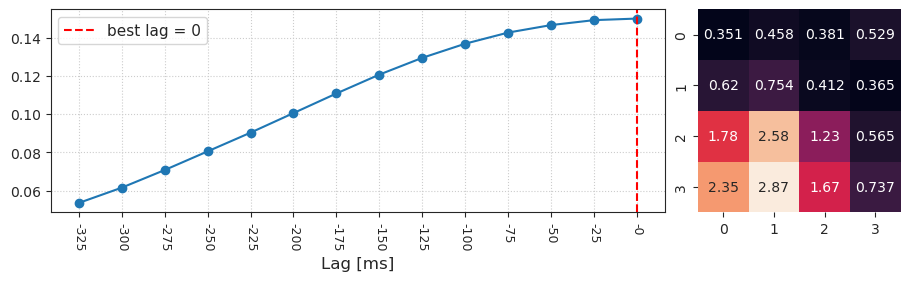

In [9]:
ro.show(0)

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (3, 1)

None

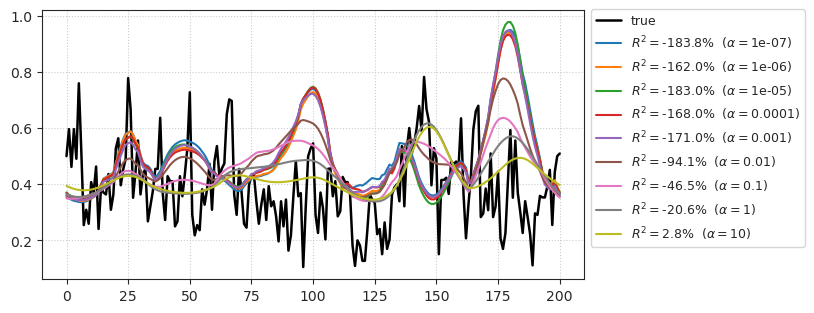

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (2, 1)

None

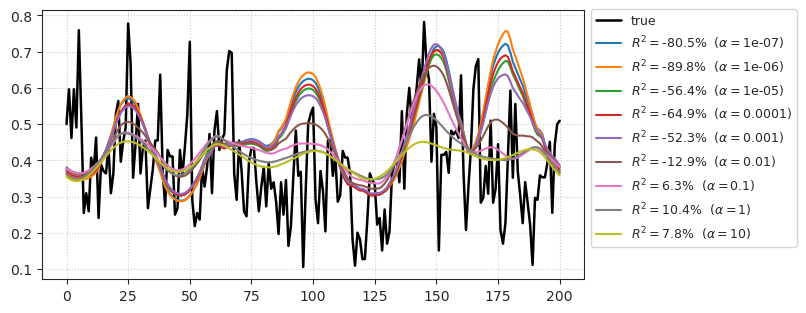

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (3, 0)

None

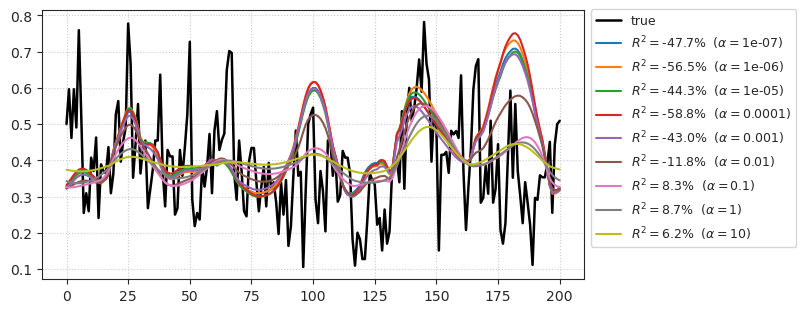

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (2, 0)

None

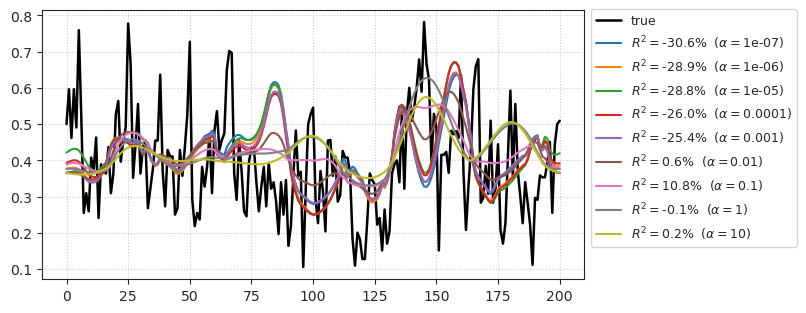

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (3, 2)

None

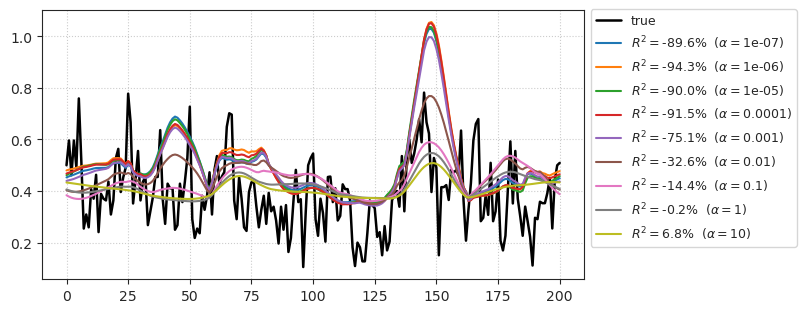

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (2, 2)

None

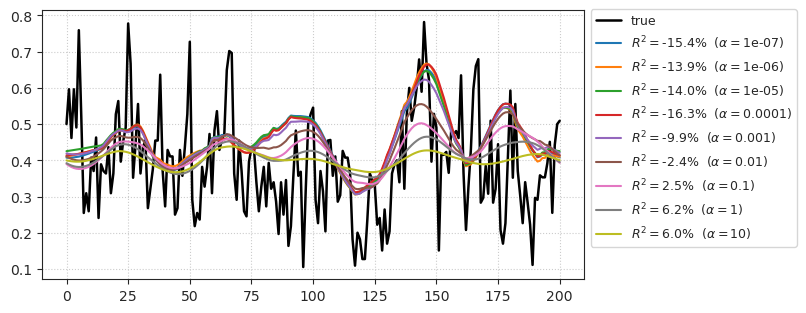

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (1, 1)

None

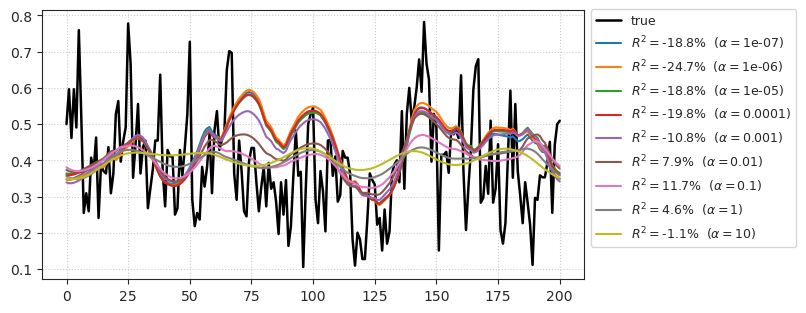

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu225, neuron # 0; pix: (i, j) = (3, 3)

None

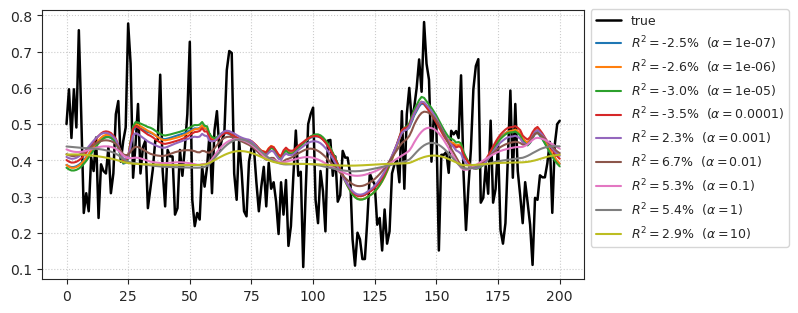

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clu225, neuron # 0;  best alpha = 0.1, best_r = 0.386

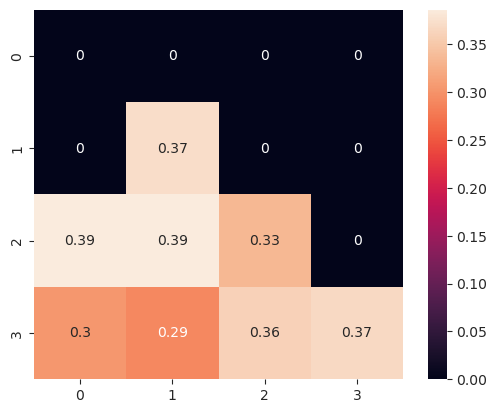

CPU times: user 1h 55min 36s, sys: 3min 51s, total: 1h 59min 28s
Wall time: 18min 40s


In [10]:
%%time

perf_r, perf_r2 = ro.fit_neuron(0, full=False)
sns.heatmap(perf_r, square=True, annot=True)
plt.show()

In [11]:
tr.model.cfg.useful_cells['clu225']

[0]

In [15]:
ro.spks_r.shape, ro.good_r.shape, ro.ftr_r.shape

((1, 57, 201), (201,), (427, 1984, 4, 4))

In [23]:
r2_ceil = max_r2(ro.spks_r).item()
r2_ceil, np.sqrt(r2_ceil)

(0.626023929200141, 0.7912167397117815)

In [24]:
0.386 / np.sqrt(r2_ceil)

0.487856210095617

In [26]:
ro.mu, ro.sd

(0.005424032, 0.06332155)

## Loop (that actually finished)

In [31]:
%%time

kws = dict(
    root='YUWEI',
    tr=tr,
    n_pcs=500,
    n_lags=13,
    n_top_pix=8,
    rescale=2.0,
    verbose=False,
)
perf_all, alpha_all, ro_all = {}, {}, {}
for expt, useful in tqdm(vae.cfg.useful_cells.items()):
    ro = ReadoutGLM(expt=expt, **kws).fit_readout()
    if ro.has_repeats:
        bound = np.sqrt(max_r2(ro.spks_r))
    else:
        bound = None
    for idx in tqdm(useful, leave=False):
        _ = ro.fit_neuron(idx, full=False)
        key = f"{expt}_{idx}"
        alpha_all[key] = ro.alphas[idx]
        r = ro.perf[idx]
        if ro.has_repeats:
            perf_all[key] = r / bound[idx]
        else:
            perf_all[key] = r

    ro.tr = None
    ro.ftr = None
    ro.ftr_r = None
    ro.x = None
    ro.x_r = None
    ro.mask = None
    ro.good = None
    ro.spks = None
    ro.spks_r = None
    ro.good_r = None
    ro_all[expt] = ro

 87%|██████████████████████████████▎    | 52/60 [26:31:25<13:51:40, 6237.61s/it]/home/hadi/Dropbox/git/_MTMST/analysis/linear.py:251: RuntimeWarning: invalid value encountered in true_divide
  n = n.reshape(shape)
/home/hadi/Dropbox/git/_MTMST/analysis/helper.py:21: RuntimeWarning: invalid value encountered in true_divide
  """
100%|██████████████████████████████████████| 60/60 [37:33:41<00:00, 2253.69s/it]

CPU times: user 11d 18h 18min 12s, sys: 9h 51min 16s, total: 12d 4h 9min 28s
Wall time: 1d 13h 33min 41s


In [32]:
perf_all

{'clu036_0': 0.19203565359735533,
 'clu037_0': 0.2677072735878635,
 'clu038_0': 0.34480885566135583,
 'clu039_0': 0.360321807595628,
 'clu040_0': 0.48785063731576034,
 'clu043_0': 0.3543577061658528,
 'clu044_0': 0.3504504725522035,
 'clu053_0': 0.47662042086290046,
 'clu055_0': 0.3996070663511025,
 'clu059_0': 0.620887586003132,
 'clu061_0': 0.16519209663480156,
 'clu064_0': 0.342636174426205,
 'clu068_0': 0.3134545972316352,
 'clu069_0': 0.09471606072374417,
 'clu081_0': 0.5140403787678423,
 'clu082_0': 0.22630721629193337,
 'clu087_0': 0.42940596748518695,
 'clu088_0': 0.7838705112318678,
 'clu089_0': 0.6576638685640044,
 'clu090_0': 0.8832263044980899,
 'clu095_0': 0.8725855631193462,
 'clu096_0': 0.648180591691055,
 'clu099_0': 0.5979826938657334,
 'clu104_0': 0.8417504612569289,
 'clu107_0': 0.6977674620836926,
 'clu108_0': 0.7465336345581735,
 'clu109_0': 0.19406487274791134,
 'clu110_0': 0.1833867196009623,
 'clu116_0': 0.7988374237393088,
 'clu120_0': 0.8553132488408761,
 'clu

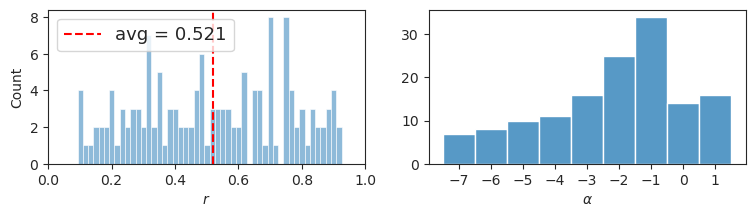

0.5208240359689668

In [55]:
fig, axes = create_figure(1, 2, (9, 2))
sns.histplot(perf_all.values(), bins=50, ax=axes[0])
avg = np.mean(list(perf_all.values()))
axes[0].axvline(avg, color='r', ls='--', label=f"avg = {avg:0.3f}")
axes[0].set(xlabel=r'$r$')
axes[0].legend(fontsize=13)
axes[0].set_xlim(0, 1)

sns.histplot(np.log10(list(alpha_all.values())), bins=np.linspace(-7, 2, 10) - 0.5, ax=axes[1])
axes[1].locator_params(axis='x', nbins=10)
axes[1].set(ylabel='', xlabel=r'$\alpha$')

plt.show()

avg

### Plot how top pixel compares

Conclusion: we should absolutely do the loop over 8 pixels

In [94]:
ranks, counts = {}, {}
for expt, ro in ro_all.items():
    for idx, best in ro.best_pix.items():
        rank = np.where(np.all(
            ro.top_pix[idx] == best,
            axis=1
        ))[0][0]
        count = collections.Counter([
            tuple(e) for e in
            ro.best_pix_all[idx]
        ])
        count = count.get(best, 0)
        
        key = f"{expt}_{idx}"
        ranks[key] = rank
        counts[key] = count

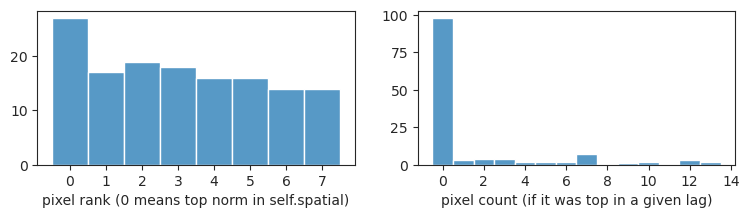

In [107]:
fig, axes = create_figure(1, 2, (9, 2))

sns.histplot(list(ranks.values()), bins=np.linspace(0, 8, 9) - 0.5, ax=axes[0])
axes[0].locator_params(axis='x', nbins=10)
axes[0].set(ylabel='', xlabel='pixel rank (0 means top norm in self.spatial)')

sns.histplot(list(counts.values()), bins=np.linspace(0, 14, 15) - 0.5, ax=axes[1])
axes[1].locator_params(axis='x', nbins=15)
axes[1].set(ylabel='', xlabel='pixel count (if it was top in a given lag)')

plt.show()

### Crude comparison to CRCNS

In [122]:
file = h5py.File(vae.cfg.h_file)
crcns = list(file.attrs.get('CRCNS_expts'))
file.close()

In [123]:
crcns = sorted(set([e.split('_')[0] for e in crcns]))
len(crcns)

61

In [130]:
perf_crcns = {}
for expt in crcns:
    perf_crcns[expt] = [
        v for k, v in
        perf_all.items()
        if expt in k
    ]

In [136]:
avg_perf_crcns = np.mean([
    np.mean(v) for v in
    perf_crcns.values() if v
])
avg_perf_crcns

0.5171883208047092

## Older stuff

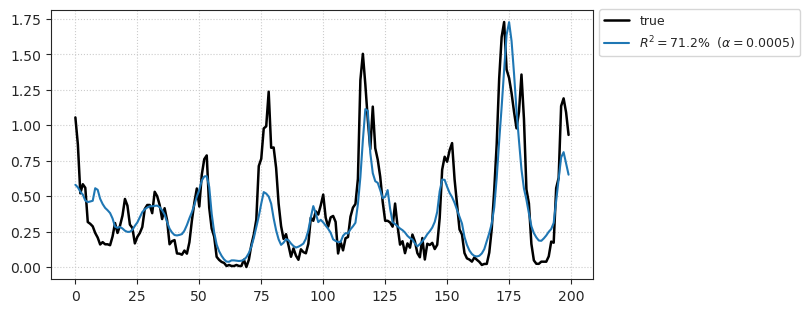

In [179]:
glm.show_pred();

#### PCA with zscoring

In [220]:
mu = x_transformed.mean(0, keepdims=True)
sd = x_transformed.std(0, keepdims=True)

x_transformed_zscored = (x_transformed - mu) / sd
x_r_transformed_zscored = (x_r_transformed - mu) / sd

In [221]:
%%time

idxs = good.copy()
idxs = idxs[idxs > best_lag[neuron_i]]

glm_kws = dict(
    category='PoissonRegressor',
    x=x_transformed_zscored[idxs - best_lag[0]],
    y=spks[idxs, neuron_i],
    x_tst=x_r_transformed_zscored[good_r - best_lag[0]],
    y_tst=np.nanmean(spks_r[neuron_i], 0),
    alphas=[1e-4, 1e-5, 1e-3, 1e-2, 1e-1],
)
glm = LinearModel(**glm_kws).fit(fit_df=False, max_iter=200)
print(glm.r2_tst)

{
    0.0001: 69.36846340134146,
    1e-05: 69.3655630389513,
    0.001: 69.39562119184599,
    0.01: 69.43433929379164,
    0.1: 65.78803857942017
}

CPU times: user 1min 4s, sys: 3.58 s, total: 1min 8s
Wall time: 7.55 s


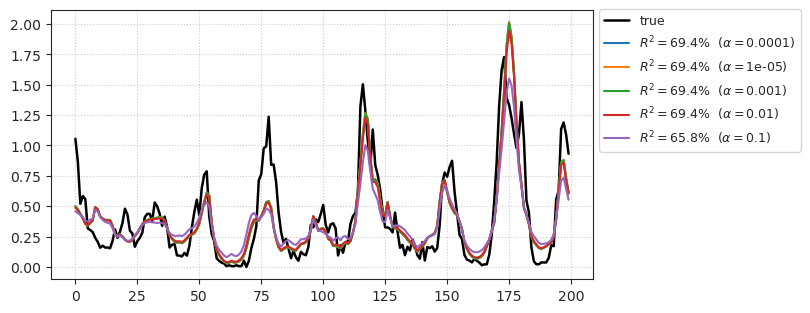

In [222]:
glm.show_pred();

In [223]:
{a: model.n_iter_ for a, model in glm.models.items()}

{0.0001: 11, 1e-05: 11, 0.001: 11, 0.01: 10, 0.1: 7}

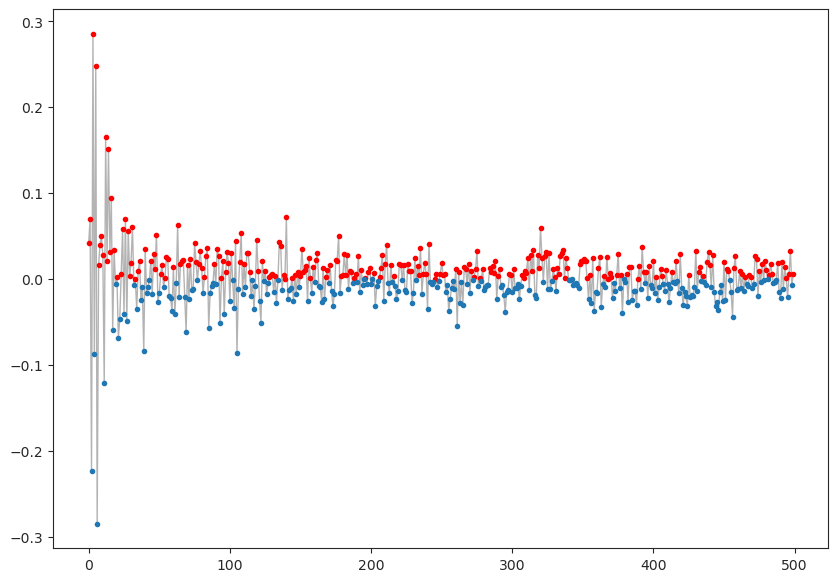

In [224]:
c = glm.models[1e-3].coef_.copy()
c_pos = c.copy()
c_neg = c.copy()
c_pos[c < 0] = np.nan
c_neg[c > 0] = np.nan

fig, ax = create_figure(1, 1, (10, 7))
plt.plot(c, color='dimgrey', lw=1, alpha=0.5)
plt.plot(c_pos, color='r', lw=0, marker='.')
plt.plot(c_neg, color='C0', lw=0, marker='.')